<a href="https://colab.research.google.com/github/nightKnight112/Bin_with_a_Brain/blob/main/Model_p_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries required

A Simple Waste Classification Model built on CNNs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

import keras
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization

extracting the dataset from a zip file

In [3]:
from zipfile import ZipFile
zf = ZipFile('drive/MyDrive/archive (1).zip', 'r')
zf.extractall()
zf.close()

Test and Train dir for model building

In [4]:
train_dir = 'DATASET/TRAIN'
test_dir = 'DATASET/TEST'

**Data augumentation**

We use ImageDataGenerator to create a transformation that rescales the images and applied data augmentation as well. We generate augumentation only for train data while validation data are only rescaling ones.

Keras **ImageDataGenerator** class provides a quick and easy way to augment of our images. It provides many of different augmentation techniques like standardization, shifts, rotation, flips, brightness change etc.

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   rescale=1./255,
                                   validation_split=0.2)


val_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split=0.5)

In [ ]:
Batch_size = 32

train_set = train_datagen.flow_from_directory(train_dir, class_mode='binary',
                                              batch_size = Batch_size,
                                              target_size=(64, 64))


val_set = val_datagen.flow_from_directory(test_dir, class_mode='binary',
                                          batch_size = Batch_size,
                                          target_size=(64, 64),
                                          subset= 'training')
   

test_set = val_datagen.flow_from_directory(test_dir, class_mode = 'binary',
                                           batch_size = Batch_size, 
                                           target_size=(64, 64),
                                           subset= 'validation')

Found 22564 images belonging to 2 classes.
Found 1257 images belonging to 2 classes.
Found 1256 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'O': 0, 'R': 1}

In [ ]:
train_set.image_shape

(64, 64, 3)

**Model Creation**

We have created an architecture for our Convolutional Neural Network (CNN) model. The architecture is simple and consists of three Convolutional layers and two fully connected layers.

In [ ]:
model = Sequential([                
  Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)), 
  MaxPool2D((2,2)),
  Conv2D(32, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Conv2D(64, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Flatten(),
  Dense(units=128, activation="relu"),
  Dense(units=1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)        

**Model Training**

In [ ]:
history = model.fit(
    train_set,
    epochs = 5,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/5
22/22 [==============================] - 9s 417ms/step - loss: 0.3635 - accuracy: 0.8509 - val_loss: 0.3686 - val_accuracy: 0.8600
Epoch 2/5
22/22 [==============================] - 9s 412ms/step - loss: 0.3771 - accuracy: 0.8438 - val_loss: 0.4034 - val_accuracy: 0.8377
Epoch 3/5
22/22 [==============================] - 9s 412ms/step - loss: 0.4080 - accuracy: 0.8210 - val_loss: 0.4114 - val_accuracy: 0.8043
Epoch 4/5
22/22 [==============================] - 9s 408ms/step - loss: 0.4104 - accuracy: 0.8267 - val_loss: 0.3698 - val_accuracy: 0.8385
Epoch 5/5
22/22 [==============================] - 9s 408ms/step - loss: 0.3450 - accuracy: 0.8466 - val_loss: 0.3805 - val_accuracy: 0.8457


***Plotting the accuracy and loss graphs***

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

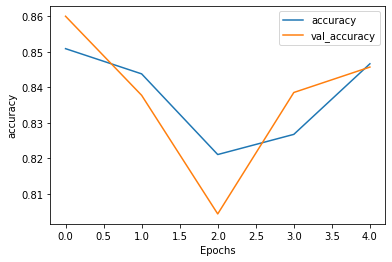

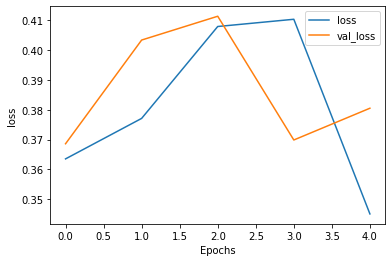

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
loss, accuracy = model.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Accuracy in %: ", accuracy*100)

Testing Accuracy:  0.9061
Accuracy in %:  90.6050980091095


**Alternate Model(built for better accuracy)**

In this model we add additional convolution layers and we reduce the complexity of architecture in fully connected layer.

In [ ]:
model2 = Sequential([
   Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(32, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(64, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(128, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Flatten(),
   Dense(64, activation="relu"),
   Dense(32, activation="relu"),
   Dense(1, activation="sigmoid")
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)        

**Model Training**

In [ ]:
#keep training until accuracy is greater than model1
history_2 = model2.fit(
    train_set,
    epochs =15,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/15
22/22 [==============================] - 10s 447ms/step - loss: 0.3745 - accuracy: 0.8409 - val_loss: 0.3833 - val_accuracy: 0.8242
Epoch 2/15
22/22 [==============================] - 10s 438ms/step - loss: 0.3537 - accuracy: 0.8310 - val_loss: 0.3496 - val_accuracy: 0.8536
Epoch 3/15
22/22 [==============================] - 10s 442ms/step - loss: 0.3964 - accuracy: 0.8366 - val_loss: 0.3745 - val_accuracy: 0.8632
Epoch 4/15
22/22 [==============================] - 10s 441ms/step - loss: 0.3542 - accuracy: 0.8509 - val_loss: 0.4072 - val_accuracy: 0.8099
Epoch 5/15
22/22 [==============================] - 10s 441ms/step - loss: 0.3995 - accuracy: 0.8324 - val_loss: 0.3482 - val_accuracy: 0.8552
Epoch 6/15
22/22 [==============================] - 10s 439ms/step - loss: 0.3547 - accuracy: 0.8679 - val_loss: 0.3725 - val_accuracy: 0.8353
Epoch 7/15
22/22 [==============================] - 10s 441ms/step - loss: 0.4015 - accuracy: 0.8239 - val_loss: 0.3777 - val_accuracy: 0.8536

***Plotting the accuracy and loss graphs***

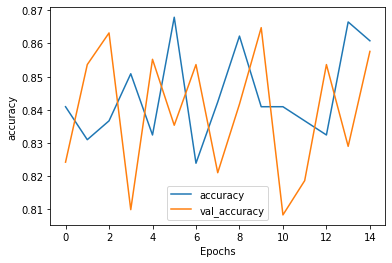

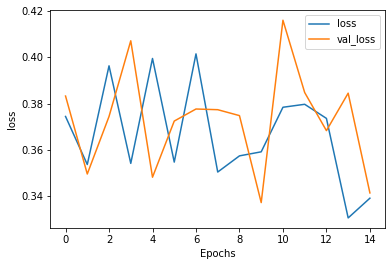

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

In [ ]:
loss, accuracy = model2.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Accuracy in %: ", accuracy*100)

Testing Accuracy:  0.9220
Accuracy in %:  92.19745397567749


**We conclude that,**

Model1 has a testing accuracy of 90.61%

Model2 has a testing accuracy of 92.20% 

**Hence, we apply model2 as our base model while designing the application**

Saving the model for further reference

In [ ]:
model2.save("bin_witha_brain_modelf.h5")

**Testing the model's prediction against a custom image**

*Image Visualization*

In [ ]:
# adding the image path 
test_image = image.load_img('test_1.jpg', target_size = (64, 64))

1200 800 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


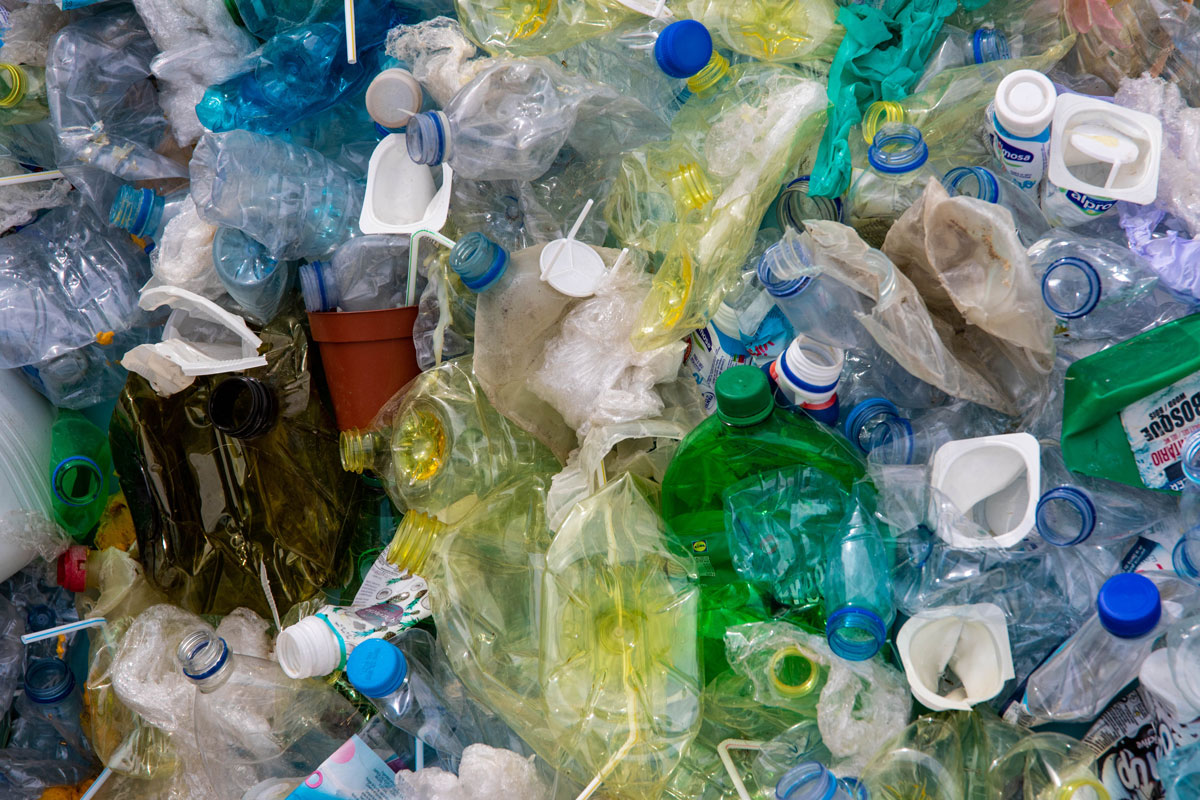

In [ ]:
import PIL
im=Image.open('test_1.jpg')
print(im.width, im.height, im.mode, im.format, type(im))
display(im)

In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# prediction
result = model2.predict(test_image)

In [ ]:
# dataset class index
train_set.class_indices

{'O': 0, 'R': 1}

In [ ]:
print(result)

[[1.]]


In [ ]:
if result[0][0] == 1:
    prediction = 'Recyclable/Non-Biodegradable Waste'
else:
    prediction = 'Organic/Biodegradable Waste'

In [ ]:
print(prediction)

Recyclable/Non-Biodegradable Waste
